In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
data_x = np.loadtxt('gesture_input_x_v11.csv', dtype=float)
data_y = np.loadtxt('gesture_input_y_v11.csv', dtype=float)

data_x.shape, data_y.shape

((314, 270), (314, 5))

In [3]:
# fix random seed for reproducibility
np.random.seed(7)

In [4]:
# split into train and test sets
train_size = int(len(data_x) * 0.8)
test_size = len(data_x) - train_size
train_size, test_size

(251, 63)

In [5]:
train_x, test_x = data_x[0:train_size,:], data_x[train_size:,:]
train_y, test_y = data_y[0:train_size,:], data_y[train_size:,:]

In [6]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((251, 270), (251, 5), (63, 270), (63, 5))

In [7]:
# reshape input to be [samples, time steps, features]
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

In [8]:
regularizer = tf.contrib.layers.l2_regularizer(scale=0.01)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [9]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(270, activation=tf.nn.tanh, kernel_regularizer=regularizer, input_shape=(1, 270)))
model.add(Dense(100, activation=tf.nn.relu, kernel_regularizer=regularizer))
model.add(Dense(5, activation=tf.nn.softmax))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 270)               584280    
_________________________________________________________________
dense (Dense)                (None, 100)               27100     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 611,885
Trainable params: 611,885
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(train_x, train_y, epochs=200, batch_size=10, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
251/251 [==============================] - 1s 3ms/sample - loss: 2.0046 - acc: 0.3426
Epoch 2/200
251/251 [==============================] - 0s 405us/sample - loss: 0.7586 - acc: 0.3825
Epoch 3/200
251/251 [==============================] - 0s 417us/sample - loss: 0.3598 - acc: 0.3865
Epoch 4/200
251/251 [==============================] - 0s 419us/sample - loss: 0.2329 - acc: 0.3825
Epoch 5/200
251/251 [==============================] - 0s 417us/sample - loss: 0.1855 - acc: 0.3705
Epoch 6/200
251/251 [==============================] - 0s 466us/sample - loss: 0.1653 - acc: 0.4263
Epoch 7/200
251/251 [==============================] - 0s 480us/sample - loss: 0.1544 - acc: 0.4303
Epoch 8/200
251/251 [==============================] - 0s 501us/sample - loss: 0.1489 - acc: 0.5378
Epoch 9/200
251/251 [==============================] - 0s 505us/sample - loss: 0.1488 - acc: 0.4661
Epoch 10/200
251/251 [==============================] 

251/251 [==============================] - 0s 431us/sample - loss: 0.0938 - acc: 0.7450
Epoch 80/200
251/251 [==============================] - 0s 415us/sample - loss: 0.0958 - acc: 0.7530
Epoch 81/200
251/251 [==============================] - 0s 453us/sample - loss: 0.0951 - acc: 0.7570
Epoch 82/200
251/251 [==============================] - 0s 449us/sample - loss: 0.0930 - acc: 0.7729
Epoch 83/200
251/251 [==============================] - 0s 427us/sample - loss: 0.0942 - acc: 0.7490
Epoch 84/200
251/251 [==============================] - 0s 426us/sample - loss: 0.0886 - acc: 0.7888
Epoch 85/200
251/251 [==============================] - 0s 438us/sample - loss: 0.0928 - acc: 0.7610
Epoch 86/200
251/251 [==============================] - 0s 449us/sample - loss: 0.0916 - acc: 0.7888
Epoch 87/200
251/251 [==============================] - 0s 426us/sample - loss: 0.0912 - acc: 0.7849
Epoch 88/200
251/251 [==============================] - 0s 425us/sample - loss: 0.0902 - acc: 0.7888
Epo

251/251 [==============================] - 0s 442us/sample - loss: 0.0781 - acc: 0.8247
Epoch 160/200
251/251 [==============================] - 0s 427us/sample - loss: 0.0894 - acc: 0.7649
Epoch 161/200
251/251 [==============================] - 0s 410us/sample - loss: 0.0823 - acc: 0.8167
Epoch 162/200
251/251 [==============================] - 0s 413us/sample - loss: 0.0849 - acc: 0.8167
Epoch 163/200
251/251 [==============================] - 0s 412us/sample - loss: 0.0830 - acc: 0.8207
Epoch 164/200
251/251 [==============================] - 0s 413us/sample - loss: 0.0839 - acc: 0.8327
Epoch 165/200
251/251 [==============================] - 0s 400us/sample - loss: 0.0790 - acc: 0.8367
Epoch 166/200
251/251 [==============================] - 0s 412us/sample - loss: 0.0774 - acc: 0.8446
Epoch 167/200
251/251 [==============================] - 0s 412us/sample - loss: 0.1087 - acc: 0.6972
Epoch 168/200
251/251 [==============================] - 0s 414us/sample - loss: 0.0889 - acc: 0

In [11]:
model.evaluate(test_x, test_y)

63/63 [==============================] - 0s 1ms/sample - loss: 0.0910 - acc: 0.7937


[0.09099126689963871, 0.7936508]

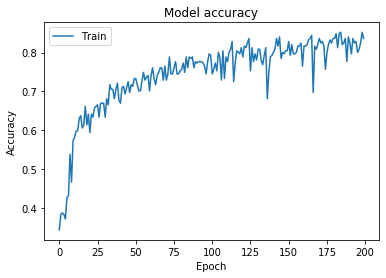

In [12]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [13]:
model.predict(test_x[10].reshape(1, 1, 270))

array([[0.07232401, 0.805886  , 0.02867882, 0.05921362, 0.03389756]],
      dtype=float32)

In [14]:
model.save("gesture_lstm_v10.h5")